In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import os
import json
import pandas as pd
import seaborn as sns
import xarray as xr

In [2]:
cell_y_coord=3
cell_x_coord=0

In [3]:
birch_dir='/data/workflows/BONA-birch/output/'
black_spruce_dir='/data/workflows/BONA-black-spruce/output/'

gpp_tr='GPP_monthly_tr.nc'
gpp_sc='GPP_monthly_sc.nc'

npp_tr='NPP_monthly_tr.nc'
npp_sc='NPP_monthly_sc.nc'

rm_tr='RM_monthly_tr.nc'
rm_sc='RM_monthly_sc.nc'

rg_tr='RG_monthly_tr.nc'
rg_sc='RG_monthly_sc.nc'

rh_tr='RH_monthly_tr.nc'
rh_sc='RH_monthly_sc.nc'

In [4]:
#GPP
gpp_bs_tr = xr.open_dataset(black_spruce_dir+gpp_tr)
tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
gpp_bs_tr = gpp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_tr = gpp_bs_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

gpp_bs_sc = xr.open_dataset(black_spruce_dir+gpp_sc)
sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()
gpp_bs_sc = gpp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_bs_sc = gpp_bs_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_bs_tr = xr.open_dataset(black_spruce_dir+npp_tr)
npp_bs_tr = npp_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_tr = npp_bs_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

npp_bs_sc = xr.open_dataset(black_spruce_dir+npp_sc)
npp_bs_sc = npp_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
npp_bs_sc = npp_bs_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#RM
rm_bs_tr = xr.open_dataset(black_spruce_dir+rm_tr)
rm_bs_tr = rm_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_tr = rm_bs_tr.variables['RM'][:, cell_y_coord, cell_x_coord]

rm_bs_sc = xr.open_dataset(black_spruce_dir+rm_sc)
rm_bs_sc = rm_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rm_bs_sc = rm_bs_sc.variables['RM'][:, cell_y_coord, cell_x_coord]

#RG
rg_bs_tr = xr.open_dataset(black_spruce_dir+rg_tr)
rg_bs_tr = rg_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_tr = rg_bs_tr.variables['RG'][:, cell_y_coord, cell_x_coord]

rg_bs_sc = xr.open_dataset(black_spruce_dir+rg_sc)
rg_bs_sc = rg_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rg_bs_sc = rg_bs_sc.variables['RG'][:, cell_y_coord, cell_x_coord]

#RH
rh_bs_tr = xr.open_dataset(black_spruce_dir+rh_tr)
rh_bs_tr = rh_bs_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_tr = rh_bs_tr.variables['RH'][:, cell_y_coord, cell_x_coord]

rh_bs_sc = xr.open_dataset(black_spruce_dir+rh_sc)
rh_bs_sc = rh_bs_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rh_bs_sc = rh_bs_sc.variables['RH'][:, cell_y_coord, cell_x_coord]

/tmp/ipykernel_763/3308875192.py:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  tr_dates = gpp_bs_tr.indexes['time'].to_datetimeindex()
/tmp/ipykernel_763/3308875192.py:8: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  sc_dates = gpp_bs_sc.indexes['time'].to_datetimeindex()


In [5]:
df_bs_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_bs_tr, 'NPP': npp_bs_tr, 'RG': rg_bs_tr, 'RH': rh_bs_tr, 'RM': rm_bs_tr})
df_bs_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_bs_sc, 'NPP': npp_bs_sc, 'RG': rg_bs_sc, 'RH': rh_bs_sc, 'RM': rm_bs_sc})
df_bs = pd.concat([df_bs_tr,df_bs_sc])
df_bs['RECO'] = df_bs['RG'] + df_bs['RM'] + df_bs['RH']
df_bs['NEE'] = df_bs['RECO'] - df_bs['GPP']
df_bs['year'] = df_bs['date'].dt.year

In [6]:
df_bs

,date,GPP,NPP,RG,RH,RM,RECO,NEE,year
0,1901-01-01,0.000000,-0.363970,0.000000,0.121881,0.363970,0.485851,0.485851,1901
1,1901-02-01,0.000000,-0.572025,0.000000,0.000000,0.572025,0.572025,0.572025,1901
2,1901-03-01,0.000000,-3.244225,0.000000,0.000000,3.244225,3.244225,3.244225,1901
3,1901-04-01,0.000000,-7.350130,0.000000,0.000000,7.350130,7.350130,7.350130,1901
4,1901-05-01,45.052316,28.020842,3.359318,0.090280,13.672152,17.121751,-27.930565,1901
...,...,...,...,...,...,...,...,...,...
1015,2100-08-01,87.125293,14.477946,1.751254,27.920128,70.896088,100.567470,13.442178,2100
1016,2100-09-01,66.476601,12.835919,1.546224,0.708003,52.094453,54.348681,-12.127921,2100
1017,2100-10-01,42.416344,10.038461,1.224772,9.676249,31.153107,42.054128,-0.362216,2100
1018,2100-11-01,14.225624,-6.295618,0.062401,0.178705,20.458841,20.699947,6.474324,2100


In [7]:
df_bs_yearly = df_bs.groupby(by=['year']).sum()
df_bs_yearly

,GPP,NPP,RG,RH,RM,RECO,NEE
year,,,,,,,
1901,222.714810,90.931429,13.328023,76.885167,118.455350,208.668540,-14.046270
1902,222.773452,91.624573,13.083545,80.497679,118.065326,211.646550,-11.126902
1903,192.964254,72.260223,10.753048,60.313078,109.950979,181.017105,-11.947149
1904,202.051368,80.019752,11.257038,59.691257,110.774579,181.722874,-20.328494
1905,254.519883,112.804057,15.733956,76.671091,125.981873,218.386921,-36.132962
...,...,...,...,...,...,...,...
2096,602.742753,185.683922,26.377248,48.738055,390.681586,465.796890,-136.945863
2097,679.607620,216.811791,29.591015,70.003217,433.204853,532.799085,-146.808535
2098,716.714481,222.455640,28.725813,53.361686,465.533011,547.620510,-169.093971


In [8]:
#GPP
gpp_br_tr = xr.open_dataset(birch_dir+gpp_tr)
gpp_br_tr = gpp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_tr = gpp_br_tr.variables['GPP'][:, cell_y_coord, cell_x_coord]

gpp_br_sc = xr.open_dataset(birch_dir+gpp_sc)
gpp_br_sc = gpp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
gpp_br_sc = gpp_br_sc.variables['GPP'][:, cell_y_coord, cell_x_coord]

#NPP
npp_br_tr = xr.open_dataset(birch_dir+npp_tr)
npp_br_tr = npp_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_tr = npp_br_tr.variables['NPP'][:, cell_y_coord, cell_x_coord]

npp_br_sc = xr.open_dataset(birch_dir+npp_sc)
npp_br_sc = npp_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
npp_br_sc = npp_br_sc.variables['NPP'][:, cell_y_coord, cell_x_coord]

#RM
rm_br_tr = xr.open_dataset(birch_dir+rm_tr)
rm_br_tr = rm_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_tr = rm_br_tr.variables['RM'][:, cell_y_coord, cell_x_coord]

rm_br_sc = xr.open_dataset(birch_dir+rm_sc)
rm_br_sc = rm_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rm_br_sc = rm_br_sc.variables['RM'][:, cell_y_coord, cell_x_coord]

#RG
rg_br_tr = xr.open_dataset(birch_dir+rg_tr)
rg_br_tr = rg_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_tr = rg_br_tr.variables['RG'][:, cell_y_coord, cell_x_coord]

rg_br_sc = xr.open_dataset(birch_dir+rg_sc)
rg_br_sc = rg_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rg_br_sc = rg_br_sc.variables['RG'][:, cell_y_coord, cell_x_coord]

#RH
rh_br_tr = xr.open_dataset(birch_dir+rh_tr)
rh_br_tr = rh_br_tr.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_tr = rh_br_tr.variables['RH'][:, cell_y_coord, cell_x_coord]

rh_br_sc = xr.open_dataset(birch_dir+rh_sc)
rh_br_sc = rh_br_sc.convert_calendar('standard', use_cftime=True, align_on='date')
rh_br_sc = rh_br_sc.variables['RH'][:, cell_y_coord, cell_x_coord]

In [9]:
df_br_tr = pd.DataFrame({'date': tr_dates, 'GPP': gpp_br_tr, 'NPP': npp_br_tr, 'RG': rg_br_tr, 'RH': rh_br_tr, 'RM': rm_br_tr})
df_br_sc = pd.DataFrame({'date': sc_dates, 'GPP': gpp_br_sc, 'NPP': npp_br_sc, 'RG': rg_br_sc, 'RH': rh_br_sc, 'RM': rm_br_sc})
df_br = pd.concat([df_br_tr,df_br_sc])
df_br['RECO'] = df_br['RG'] + df_br['RM'] + df_br['RH']
df_br['NEE'] = df_br['RECO'] - df_br['GPP']
df_br['year'] = df_br['date'].dt.year

In [10]:
df_br_yearly = df_br.groupby(by=['year']).sum()
df_br_yearly

,GPP,NPP,RG,RH,RM,RECO,NEE
year,,,,,,,
1901,832.894186,402.135051,52.178614,378.050227,378.580530,808.809371,-24.084816
1902,840.656296,410.028331,51.938615,410.205533,378.689355,840.833503,0.177206
1903,907.177164,478.701566,59.143497,388.216129,369.332100,816.691725,-90.485438
1904,920.002499,485.693138,59.152386,446.850017,375.156979,881.159383,-38.843116
1905,842.580061,387.185531,49.058032,376.672554,406.336497,832.067083,-10.512978
...,...,...,...,...,...,...,...
2096,1368.063701,540.778700,71.474729,469.312263,755.810246,1296.597238,-71.466462
2097,1484.936003,611.442745,79.565652,440.356350,793.927593,1313.849596,-171.086407
2098,1789.973830,843.008929,103.651628,472.904503,843.313285,1419.869416,-370.104414


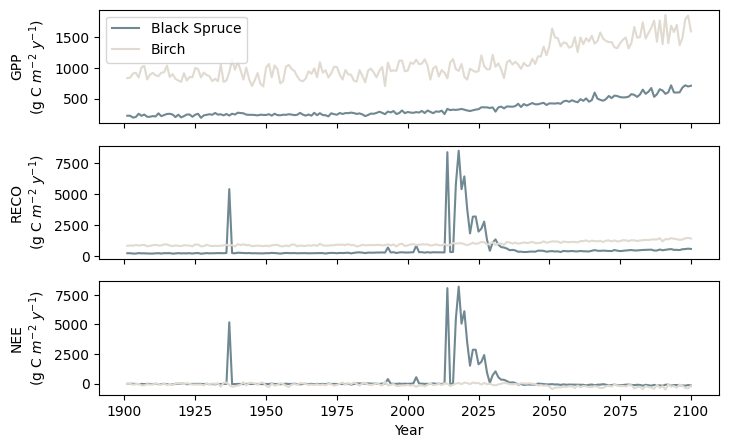

In [11]:
#sns.set_palette(sns.color_palette("Greys",2))
fig, axes=plt.subplots(3,1,figsize=(8,5))
sns.lineplot(data=df_bs_yearly, x='year', y='GPP', ax=axes[0], label = 'Black Spruce', color='#708891')
sns.lineplot(data=df_br_yearly, x='year', y='GPP', ax=axes[0], label = 'Deciduous', color='#E0DAD0')
sns.lineplot(data=df_bs_yearly, x='year', y='RECO', ax=axes[1], color='#708891')
sns.lineplot(data=df_br_yearly, x='year', y='RECO', ax=axes[1], color='#E0DAD0')
sns.lineplot(data=df_bs_yearly, x='year', y='NEE', ax=axes[2], color='#708891')
sns.lineplot(data=df_br_yearly, x='year', y='NEE', ax=axes[2], color='#E0DAD0')

axes[0].xaxis.set_tick_params(labelbottom=False)
axes[1].xaxis.set_tick_params(labelbottom=False)
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[0].set_ylabel('GPP\n(g C $m^{-2}$ $y^{-1}$)')
axes[1].set_ylabel('RECO\n(g C $m^{-2}$ $y^{-1}$)')
axes[2].set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
plt.xlabel('Year')
plt.savefig('BONA_carbon_a.jpg', dpi=300)

In [12]:
bins=['2000-2009', '2010-2019', '2020-2029', '2030-2039', '2040-2049', 
      '2050-2059', '2060-2069', '2070-2079', '2080-2089', '2090-2100']
df_bs_recent=df_bs_yearly.loc[df_bs_yearly.index>=2000]
df_br_recent=df_br_yearly.loc[df_br_yearly.index>=2000]

df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()

df_bs_recent.loc[df_bs_recent.index==2100, 'bin_index']=9
df_br_recent.loc[df_bs_recent.index==2100, 'bin_index']=9

/tmp/ipykernel_763/1446786587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['bin_index']= ((df_bs_recent.index.astype(int)-2000)/10).astype(int).to_list()
/tmp/ipykernel_763/1446786587.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['bin_index']= ((df_br_recent.index.astype(int)-2000)/10).astype(int).to_list()


In [13]:
df_bs_recent['stand'] = 'Black Spruce'
df_br_recent['stand'] = 'Birch'
df_recent=pd.concat([df_bs_recent, df_br_recent])

/tmp/ipykernel_763/3216363827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs_recent['stand'] = 'Black Spruce'
/tmp/ipykernel_763/3216363827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br_recent['stand'] = 'Birch'


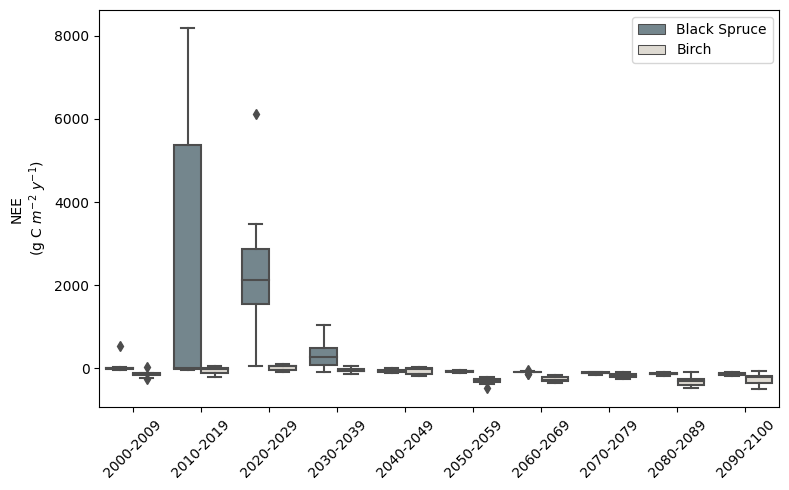

In [14]:
fig, ax=plt.subplots(figsize=(8,5))
sns.set_palette(sns.color_palette(['#708891', '#E0DAD0']))
sns.boxplot(data=df_recent, x = 'bin_index', y = 'NEE', hue='stand')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
ax.set_xticklabels(bins)
plt.xticks(rotation = 45)
ax.set_ylabel('NEE\n(g C $m^{-2}$ $y^{-1}$)')
ax.set_xlabel('')
fig.tight_layout()
plt.savefig('BONA_carbon_b.jpg', dpi=300)
plt.show()

<AxesSubplot:xlabel='year', ylabel='GPP'>

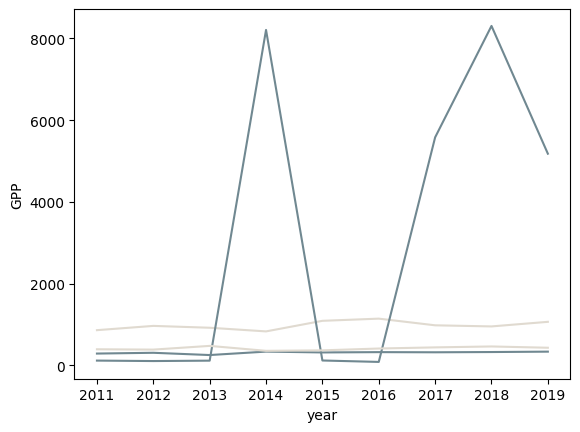

In [15]:
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='GPP')
sns.lineplot(data=df_bs_yearly[(df_bs_yearly.index>2010) & (df_bs_yearly.index<2020)], x='year', y='RH')
sns.lineplot(data=df_br_yearly[(df_br_yearly.index>2010) & (df_br_yearly.index<2020)], x='year', y='RH')